In [16]:
%matplotlib notebook

In [145]:
%run OmniglotInceptionV3ClusterAndClassify.py
%run prototype_models.py
from prototype_utils import gen_exception
random_state=25
np.random.seed(random_state)
skf, skf_cv = spliters(random_state, cv_repeats=5)

In [146]:
from scipy.stats import entropy, uniform, randint, norm, reciprocal

# Prototypes as exception memory

Here we want to combine somehow prototypes and the regular CNN predictions to make prototypes be a sort of memory for exceptions.

<IPython.core.display.Javascript object>


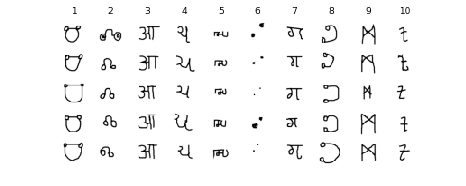

In [147]:
N = 10
X_imgs, X, y = gen_omniglot(N=N,random_seed=random_state, plot=True)
train, test = next(skf.split(X,y))
# train, val = next(skf_cv.split(X[train], y[train]))

In [141]:
X_ex, y_ex = gen_exception(X, y, [0,1], n=2, margin=5.8, radius=0.01)
ex = np.arange(len(train),len(train)+X_ex.shape[0])
X_ex.shape, y_ex.shape, ex

((4, 2048), (4,), array([100, 101, 102, 103]))

In [148]:
X_train, y_train = X[train], y[train]
X_train = np.concatenate([X[train], X_ex], axis=0)
y_train = np.concatenate([y[train], y_ex], axis=0)
X_train.shape, y_train.shape

((104, 2048), (104,))

In [149]:
direct = LogisticRegression(random_state=random_state,multi_class='multinomial', 
                            solver='lbfgs')
direct = RandomizedSearchCV(direct, dict(C=reciprocal(1e-2,1e5)), 
                            n_iter=10, cv=skf_cv, random_state=random_state)

In [150]:
direct.fit(X_train, y_train)

/mnt/Data/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/Data/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/Data/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/Data/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/Data/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of

/mnt/Data/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/Data/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/Data/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/Data/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/Data/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of

/mnt/Data/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/Data/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/Data/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/Data/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/Data/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of

RandomizedSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x7f674f7d6d30>,
          error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=25, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6754365860>},
          pre_dispatch='2*n_jobs', random_state=25, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [151]:
direct.best_params_

{'C': 0.8951021183004078}

In [152]:
direct.best_estimator_.n_iter_

array([100], dtype=int32)

In [153]:
prototypes = MultiPrototypes(random_state=random_state, cluster__n_init=10, cluster__max_iter=100, 
                             classify__max_iter=100)

prototypes = RandomizedSearchCV(prototypes,
                                dict(classify__C=uniform(1e2,1e4), cluster__n_clusters=randint(10,50)),
                                n_iter=10, cv=skf_cv, random_state=random_state)

In [154]:
%pdb off
prototypes.fit(X_train, y_train)

Automatic pdb calling has been turned OFF


RandomizedSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x7f674f7d6d30>,
          error_score='raise-deprecating',
          estimator=MultiPrototypes(cachedir='/mnt/Data/tmp/tmp3ewyat8x', random_state=25,
        verbose=0),
          fit_params=None, iid='warn', n_iter=10, n_jobs=1,
          param_distributions={'classify__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f674f5720f0>, 'cluster__n_clusters': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f675480b1d0>},
          pre_dispatch='2*n_jobs', random_state=25, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [155]:
prototypes.best_params_

{'classify__C': 8801.24136627212, 'cluster__n_clusters': 36}

<IPython.core.display.Javascript object>


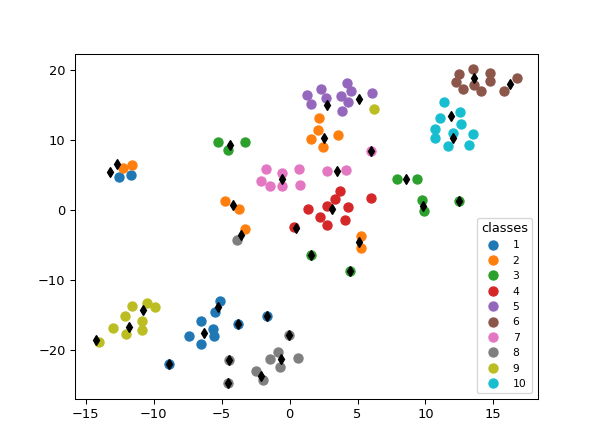

In [158]:
def plot_protos(X,y):
    np.random.seed(random_state)
    clusters = prototypes.best_estimator_.named_steps.cluster.cluster_centers_
    proj = TSNE(n_components=2, perplexity=20)
    #proj = Isomap(n_components=2, n_neighbors=3)
    data_clusters = np.concatenate([X, clusters])
    data_clusters = proj.fit_transform(data_clusters)
    data, clusters = data_clusters[:X.shape[0],...], data_clusters[X.shape[0]:,...]
    plot2D(data, y)
    for c in clusters:
        plt.plot(c[0], c[1], ms=5,
                 marker='d', linewidth=0, color='k')
plot_protos(X_train, y_train)

<IPython.core.display.Javascript object>


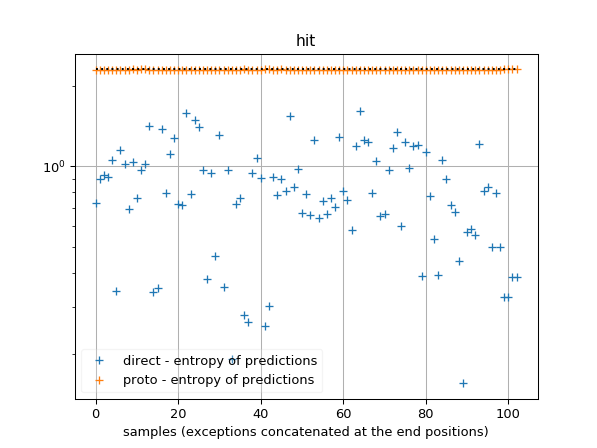

<IPython.core.display.Javascript object>


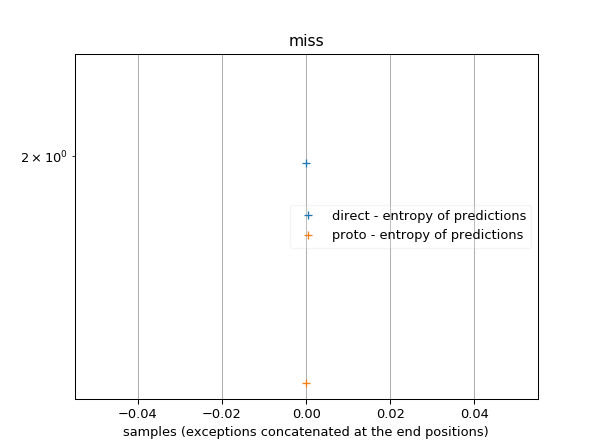

In [168]:
def plot_entropy(X, y, which='miss'):

    if which == 'miss':
        mask =(direct.predict(X)!=y)
    elif which == 'hit':
        mask = (direct.predict(X)==y)
    if not np.any(mask):
        print("no ", which)
    else:
        plt.figure()
        plt.plot(entropy(direct.predict_proba(X[mask]).T), label='direct - entropy of predictions',
            linestyle= 'none', marker='+')
        plt.plot(entropy(prototypes.predict_proba(X[mask]).T), label='proto - entropy of predictions',
                linestyle= 'none', marker='+')
        plt.xlabel("samples (exceptions concatenated at the end positions)")
        plt.legend(loc='best', framealpha=0.2)
        plt.yscale('log')
        plt.grid(which='major', axis='both')
        plt.title(which)
        plt.plot(np.arange(X[mask].shape[0]), np.log(N)+np.zeros(X[mask].shape[0]), 'k:')
    #plt.plot([len(train)]*2, plt.ylim(), 'k:')
#plot_entropy(X_train, y_train, 'miss')
plot_entropy(X_train, y_train, 'hit')
plot_entropy(X_train, y_train, 'miss')


<IPython.core.display.Javascript object>


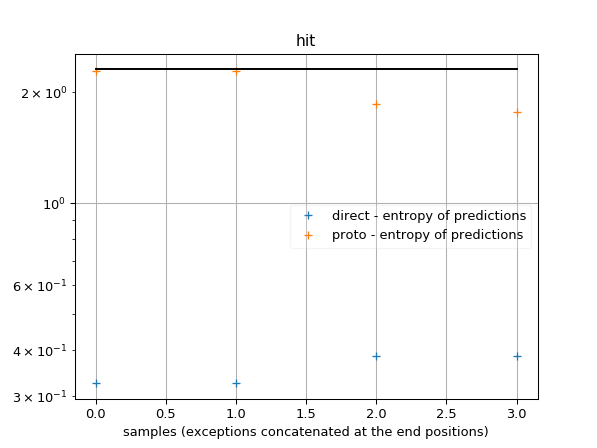

no  miss


In [164]:
plot_entropy(X_ex, y_ex, 'hit')
plot_entropy(X_ex, y_ex, 'miss')

In [161]:
prototypes.predict_proba(X_train)

array([[0.09921902, 0.10310354, 0.09465444, ..., 0.09729379, 0.11788378,
        0.09736355],
       [0.08926133, 0.10715356, 0.10824292, ..., 0.09061965, 0.09219632,
        0.10294659],
       [0.08771165, 0.10604875, 0.11077714, ..., 0.08876831, 0.09092235,
        0.10372933],
       ...,
       [0.10849221, 0.09905642, 0.09905642, ..., 0.09905642, 0.09905642,
        0.09905642],
       [0.09905642, 0.10849222, 0.09905642, ..., 0.09905642, 0.09905642,
        0.09905642],
       [0.09905642, 0.10849222, 0.09905642, ..., 0.09905642, 0.09905642,
        0.09905642]])

<IPython.core.display.Javascript object>


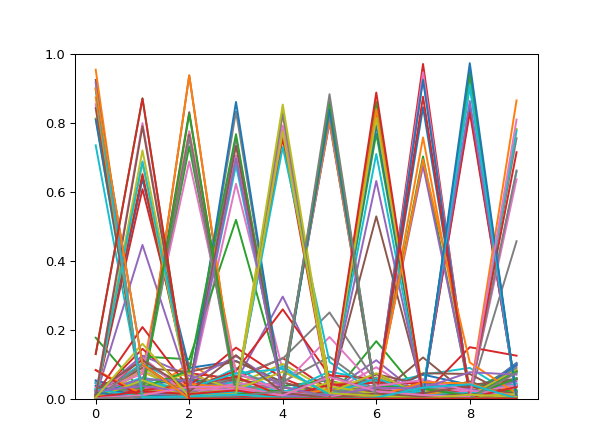

(0, 1)

In [162]:
plt.figure()
plt.plot(direct.predict_proba(X_train).T)
plt.ylim(0,1)

<IPython.core.display.Javascript object>


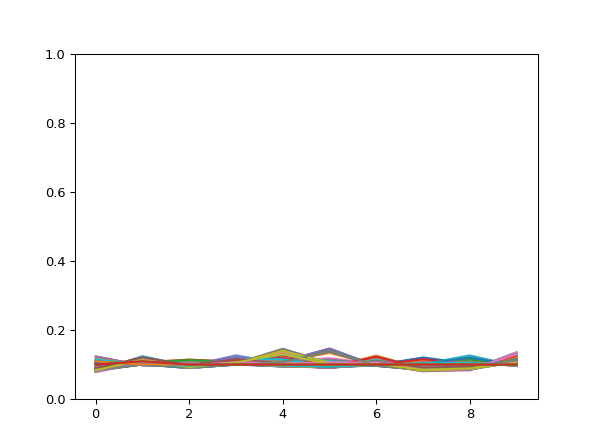

(0, 1)

In [163]:
plt.figure()
plt.plot(prototypes.predict_proba(X_train).T)
plt.ylim(0,1)

In [169]:
prototypes.best_estimator_.named_steps.cluster.transform(X[train])

{'X': array([[2.06193807e-04, 9.22722742e-04, 9.18889253e-04, ...,
         1.19854473e-04, 1.04364649e-04, 7.25203060e-05],
        [7.92015937e-05, 1.74793887e-03, 1.75190040e-03, ...,
         1.60114364e-04, 9.18633535e-05, 2.47820156e-05],
        [8.66997737e-05, 1.59811491e-03, 1.59977789e-03, ...,
         1.83219822e-04, 8.55815569e-05, 2.32838140e-05],
        ...,
        [7.46023960e-05, 1.11435100e-03, 1.11805193e-03, ...,
         6.37828531e-04, 4.91781420e-05, 2.03707370e-05],
        [1.07611653e-04, 1.12663170e-03, 1.12961836e-03, ...,
         3.58133106e-04, 9.77559275e-05, 3.69245018e-05],
        [6.82950079e-05, 1.04167757e-03, 1.03639695e-03, ...,
         5.87084682e-05, 5.30972252e-05, 9.08890077e-05]]),
 'X_old': array([[0.        , 0.        , 0.26621142, ..., 0.        , 0.4157087 ,
         0.00110925],
        [0.        , 0.        , 0.31695738, ..., 0.        , 0.25705588,
         0.        ],
        [0.        , 0.        , 0.34107488, ..., 0.       

In [170]:
prototypes.score(X_train, y_train)

0.9423076923076923

In [171]:
direct.score(X_train, y_train)

0.9903846153846154

In [330]:
from scipy.optimize import minimize_scalar
class Combination(BaseEstimator,ClassifierMixin):
    def __init__(self,estimator1, estimator2):
        self.estimator1 = estimator1
        self.estimator2 = estimator2
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)
    
    def predict_proba(self, X):
        pred1 = self.estimator1.predict_proba(X)
        pred2 = self.estimator2.predict_proba(X)
        return self._combine_predictions(pred1,pred2)
    
    def _combine_predictions(self, pred1, pred2):
        """
        pred1 and pred2 are prediction matrices samples x class_probas
        """ 
        new_preds = []
        for i in range(pred1.shape[0]):
            p = lambda a : a*pred1[i]+(1-a)*pred2[i]
            H = lambda a: entropy(p(a))
            opt_result = \
                minimize_scalar(H, bounds=(0,1), method='bounded')
            amin = opt_result.x
            new_preds.append(p(amin))
        return np.array(new_preds)  

In [331]:
comb = Combination(direct,prototypes)

new_probas = comb.predict_proba(X_train)
new_probas.shape, X_train.shape

((104, 10), (104, 2048))

In [332]:
comb.score(X_train, y_train)

0.9903846153846154

In [333]:
miss = direct.predict(X_train)!=y_train

comb.score(X_train[miss].reshape(1,2048), y_train[miss])

0.0

<IPython.core.display.Javascript object>


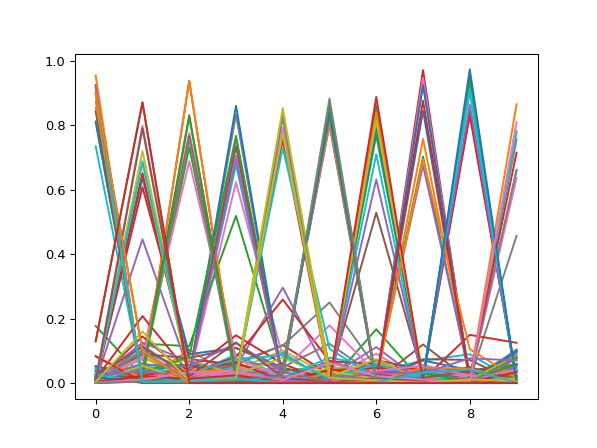

In [281]:
plt.figure()
plt.plot(new_probas.T)